# 1.Import Libraries

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

# 2.Import Dataset

In [161]:
glass_data=pd.read_csv('glass.csv')
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# 3.Data Understanding

In [162]:
glass_data.shape

(214, 10)

In [163]:
glass_data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [164]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [165]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [166]:
glass_data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [167]:
glass_data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

# 5.Model Building

In [168]:
X=glass_data.drop('Type',axis=1)
y=glass_data[['Type']]

In [169]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=89)

In [170]:
X_train.shape,y_train.shape

((171, 9), (171, 1))

In [171]:
X_test.shape,y_test.shape

((43, 9), (43, 1))

# 6.Model Training

In [172]:
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier()

# 7.Model Testing | Model Evaluation

#### Train data

In [173]:
y_pred_train=knn_classifier.predict(X_train)

In [174]:
accuracy_score(y_train,y_pred_train)

0.7719298245614035

#### Test data

In [175]:
y_pred_test=knn_classifier.predict(X_test)

In [176]:
accuracy_score(y_test,y_pred_test)

0.5581395348837209

# Standardizing

In [177]:
std_scaler=StandardScaler()
X_scaled=std_scaler.fit_transform(X_train)
X_scaled=pd.DataFrame(data=X_train,columns=X.columns)
X_scaled

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
78,1.51613,13.92,3.52,1.25,72.88,0.37,7.94,0.00,0.14
92,1.51588,13.12,3.41,1.58,73.26,0.07,8.39,0.00,0.19
67,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17
147,1.51610,13.33,3.53,1.34,72.67,0.56,8.33,0.00,0.00
79,1.51590,12.82,3.52,1.90,72.86,0.69,7.97,0.00,0.00
...,...,...,...,...,...,...,...,...,...
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
86,1.51569,13.24,3.49,1.47,73.25,0.38,8.03,0.00,0.00
186,1.51838,14.32,3.26,2.22,71.25,1.46,5.79,1.63,0.00
116,1.51829,13.24,3.90,1.41,72.33,0.55,8.31,0.00,0.10


# Finding Optimal value for K

In [178]:
container_acc_values=[]
for i in range(3,51):
    knn_model=KNeighborsClassifier(n_neighbors=i)
    accu=cross_val_score(estimator=knn_model,X=X_scaled,y=y_train,cv=5)
    container_acc_values.append(accu.mean())
container_acc_values    
    

[0.6603361344537815,
 0.6312605042016808,
 0.6373109243697479,
 0.6371428571428572,
 0.6314285714285715,
 0.6371428571428572,
 0.6312605042016807,
 0.6430252100840337,
 0.6487394957983194,
 0.6547899159663866,
 0.6489075630252101,
 0.6489075630252101,
 0.6490756302521008,
 0.6431932773109243,
 0.6547899159663866,
 0.6431932773109243,
 0.6489075630252101,
 0.6430252100840336,
 0.6430252100840336,
 0.6312605042016807,
 0.6312605042016807,
 0.6312605042016808,
 0.6371428571428572,
 0.6371428571428572,
 0.6371428571428572,
 0.6371428571428572,
 0.6371428571428572,
 0.6371428571428572,
 0.6312605042016807,
 0.6312605042016807,
 0.6312605042016808,
 0.6253781512605043,
 0.6253781512605043,
 0.6194957983193278,
 0.6312605042016808,
 0.6312605042016808,
 0.6136134453781512,
 0.5959663865546219,
 0.6018487394957983,
 0.6136134453781513,
 0.6077310924369749,
 0.6077310924369749,
 0.6136134453781513,
 0.6137815126050421,
 0.6078991596638657,
 0.5726050420168067,
 0.5784873949579832,
 0.5610084033

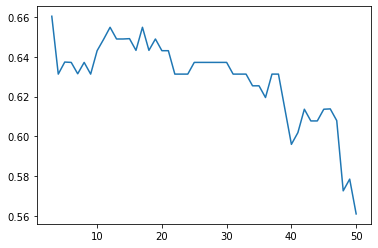

In [179]:
plt.plot(range(3,51),container_acc_values)
plt.show()

In [180]:
container_acc_values.index(max(container_acc_values))

0

# GridSearchCV

In [181]:
weights = ['uniform', 'distance']
algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size=[25,30,35,40,45]
grid={'weights':weights,'algorithm':algorithm,'leaf_size':leaf_size}

In [182]:
grid_search_cv=GridSearchCV(estimator=knn_classifier,param_grid=grid)
grid_search_cv.fit(X,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [25, 30, 35, 40, 45],
                         'weights': ['uniform', 'distance']})

In [183]:
grid_search_cv.best_params_

{'algorithm': 'auto', 'leaf_size': 25, 'weights': 'uniform'}

In [184]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=89)

# Building final Model

In [185]:
knn_final=KNeighborsClassifier(algorithm='auto',leaf_size=25,weights='uniform',n_neighbors=3)

In [186]:
knn_final.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=25, n_neighbors=3)

In [187]:
y_pred_train=knn_final.predict(X_train)

In [188]:
accuracy_score(y_train,y_pred_train)

0.8245614035087719

In [189]:
confusion_matrix(y_train,y_pred_train)

array([[52,  4,  0,  0,  0,  0],
       [11, 48,  0,  1,  1,  0],
       [ 4,  1,  9,  0,  0,  0],
       [ 0,  0,  0, 10,  0,  0],
       [ 0,  2,  0,  0,  4,  1],
       [ 2,  2,  0,  0,  1, 18]], dtype=int64)

In [190]:
y_pred_test=knn_final.predict(X_test)

In [191]:
accuracy_score(y_test,y_pred_test)

0.6511627906976745

In [192]:
confusion_matrix(y_test,y_pred_test)

array([[10,  2,  2,  0,  0,  0],
       [ 4, 10,  1,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  2,  0],
       [ 1,  1,  0,  0,  0,  4]], dtype=int64)

# Handling imbalanced data using SMOTE Technique

In [193]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [194]:
sm=SMOTE()
X_sm,y_sm=sm.fit_resample(X_scaled,y_train)

In [195]:
y_train.shape,y_sm.shape

((171, 1), (366, 1))

#  Training model balanced data   

In [196]:
knn_final.fit(X_sm,y_sm)

KNeighborsClassifier(leaf_size=25, n_neighbors=3)

In [197]:
y_pred_train_1=knn_classifier.predict(X_train)

In [198]:
print(accuracy_score(y_train,y_pred_train_1))
print(confusion_matrix(y_train,y_pred_train_1))
print(classification_report(y_train,y_pred_train_1))

0.7719298245614035
[[49  6  1  0  0  0]
 [12 48  0  1  0  0]
 [ 6  1  7  0  0  0]
 [ 0  2  0  8  0  0]
 [ 0  4  0  0  2  1]
 [ 1  2  0  1  1 18]]
              precision    recall  f1-score   support

           1       0.72      0.88      0.79        56
           2       0.76      0.79      0.77        61
           3       0.88      0.50      0.64        14
           5       0.80      0.80      0.80        10
           6       0.67      0.29      0.40         7
           7       0.95      0.78      0.86        23

    accuracy                           0.77       171
   macro avg       0.80      0.67      0.71       171
weighted avg       0.78      0.77      0.77       171



In [199]:
y_pred_test_1=knn_classifier.predict(X_test)

In [200]:
print(accuracy_score(y_test,y_pred_test_1))
print(confusion_matrix(y_test,y_pred_test_1))
print(classification_report(y_test,y_pred_test_1))

0.5581395348837209
[[9 4 1 0 0 0]
 [6 9 0 0 0 0]
 [3 0 0 0 0 0]
 [0 1 0 2 0 0]
 [0 2 0 0 0 0]
 [1 1 0 0 0 4]]
              precision    recall  f1-score   support

           1       0.47      0.64      0.55        14
           2       0.53      0.60      0.56        15
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       0.00      0.00      0.00         2
           7       1.00      0.67      0.80         6

    accuracy                           0.56        43
   macro avg       0.50      0.43      0.45        43
weighted avg       0.55      0.56      0.54        43



# RandomOverSampling for imbalanced data

In [201]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [202]:
ror=RandomOverSampler(random_state=899)
X_ror,y_ror=ror.fit_resample(X_train,y_train)
print(sorted(Counter(y_ror).items()),y_ror.shape)

[('Type', 1)] (366, 1)


In [203]:
y_train.shape

(171, 1)

In [204]:
knn_final.fit(X_ror,y_ror)

KNeighborsClassifier(leaf_size=25, n_neighbors=3)

### train data

In [205]:
y_pred_train_ror=knn_final.predict(X_train)

In [206]:
print(accuracy_score(y_train,y_pred_train_ror))
print(confusion_matrix(y_train,y_pred_train_ror))
print(classification_report(y_train,y_pred_train_ror))

0.8596491228070176
[[48  4  4  0  0  0]
 [11 45  1  2  2  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  0  0  7  0]
 [ 0  0  0  0  0 23]]
              precision    recall  f1-score   support

           1       0.81      0.86      0.83        56
           2       0.92      0.74      0.82        61
           3       0.74      1.00      0.85        14
           5       0.83      1.00      0.91        10
           6       0.78      1.00      0.88         7
           7       1.00      1.00      1.00        23

    accuracy                           0.86       171
   macro avg       0.85      0.93      0.88       171
weighted avg       0.87      0.86      0.86       171



### test data

In [207]:
y_pred_test_ror=knn_final.predict(X_test)

In [208]:
print(accuracy_score(y_test,y_pred_test_ror))
print(confusion_matrix(y_test,y_pred_test_ror))
print(classification_report(y_test,y_pred_test_ror))

0.6046511627906976
[[7 2 5 0 0 0]
 [4 9 2 0 0 0]
 [3 0 0 0 0 0]
 [0 0 0 2 0 1]
 [0 0 0 0 2 0]
 [0 0 0 0 0 6]]
              precision    recall  f1-score   support

           1       0.50      0.50      0.50        14
           2       0.82      0.60      0.69        15
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         2
           7       0.86      1.00      0.92         6

    accuracy                           0.60        43
   macro avg       0.70      0.63      0.65        43
weighted avg       0.68      0.60      0.64        43



In [210]:
from imblearn.under_sampling import RandomUnderSampler

In [211]:
nm=RandomUnderSampler(random_state=998)

In [213]:
X_nm,y_nm=nm.fit_resample(X_train,y_train)
y_train.shape,y_nm.shape

((171, 1), (42, 1))

In [214]:
knn_final.fit(X_nm,y_nm)

KNeighborsClassifier(leaf_size=25, n_neighbors=3)

In [215]:
y_pred_train_nm=knn_final.predict(X_train)

In [216]:
print(accuracy_score(y_train,y_pred_train_nm))
print(confusion_matrix(y_train,y_pred_train_nm))
print(classification_report(y_train,y_pred_train_nm))

0.672514619883041
[[39  8  9  0  0  0]
 [ 9 36  7  5  4  0]
 [ 6  0  8  0  0  0]
 [ 0  0  0  8  0  2]
 [ 0  1  0  0  6  0]
 [ 1  1  0  1  2 18]]
              precision    recall  f1-score   support

           1       0.71      0.70      0.70        56
           2       0.78      0.59      0.67        61
           3       0.33      0.57      0.42        14
           5       0.57      0.80      0.67        10
           6       0.50      0.86      0.63         7
           7       0.90      0.78      0.84        23

    accuracy                           0.67       171
   macro avg       0.63      0.72      0.66       171
weighted avg       0.71      0.67      0.68       171



In [217]:
y_pred_test_nm=knn_final.predict(X_test)

In [218]:
print(accuracy_score(y_test,y_pred_test_nm))
print(confusion_matrix(y_test,y_pred_test_nm))
print(classification_report(y_test,y_pred_test_nm))

0.3953488372093023
[[7 2 5 0 0 0]
 [7 2 3 2 1 0]
 [3 0 0 0 0 0]
 [0 1 0 2 0 0]
 [0 0 0 0 2 0]
 [0 1 0 0 1 4]]
              precision    recall  f1-score   support

           1       0.41      0.50      0.45        14
           2       0.33      0.13      0.19        15
           3       0.00      0.00      0.00         3
           5       0.50      0.67      0.57         3
           6       0.50      1.00      0.67         2
           7       1.00      0.67      0.80         6

    accuracy                           0.40        43
   macro avg       0.46      0.49      0.45        43
weighted avg       0.45      0.40      0.40        43



### With OverSampling we increased accuracy